In [ ]:
# Creating a new data frame

df = pd.DataFrame({'city' : ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

print(df)


# Creating a geodataframe and transforming latitude and longitude into shapely.Point objects

gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))


In [7]:
print(gdf.head())

           city    Country  Latitude  Longitude               geometry
0  Buenos Aires  Argentina    -34.58     -58.66  POINT (-58.66 -34.58)
1      Brasilia     Brazil    -15.78     -47.91  POINT (-47.91 -15.78)
2      Santiago      Chile    -33.45     -70.66  POINT (-70.66 -33.45)
3        Bogota   Colombia      4.60     -74.08     POINT (-74.08 4.6)
4       Caracas  Venezuela     10.48     -66.86   POINT (-66.86 10.48)


In [10]:

# If we have a dataframe in WKT format


df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Coordinates': ['POINT(-34.58 -58.66)', 'POINT(-15.78 -47.91)',
                     'POINT(-33.45 -70.66)', 'POINT(4.60 -74.08)',
                     'POINT(10.48 -66.86)']})

In [11]:
# using shapely.wkt to parse wkt format

from shapely import wkt
df['Coordinates'] = df['Coordinates'].apply(wkt.loads)

In [12]:
# Constructing GeoDataFrame like above

gdf = geopandas.GeoDataFrame(df, geometry='Coordinates')
print(gdf.head())

           City    Country            Coordinates
0  Buenos Aires  Argentina  POINT (-34.58 -58.66)
1      Brasilia     Brazil  POINT (-15.78 -47.91)
2      Santiago      Chile  POINT (-33.45 -70.66)
3        Bogota   Colombia     POINT (4.6 -74.08)
4       Caracas  Venezuela   POINT (10.48 -66.86)


# Plotting with Geoplot and GeoPandas

In [2]:
# Loading the data using GeoPandas . Usig geoplot API (input - GeoPandas)

import geopandas
import geoplot

world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)
boroughs = geopandas.read_file(
    geoplot.datasets.get_path('nyc_boroughs')
)
collisions = geopandas.read_file(
    geoplot.datasets.get_path('nyc_injurious_collisions')
)



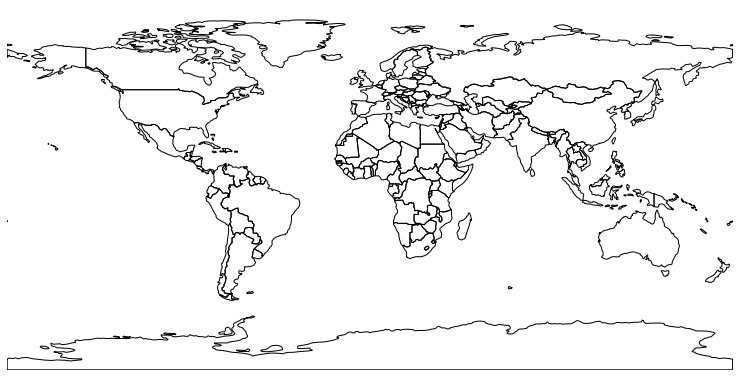

In [3]:
# Replicating the basic GeoPandas world plot using Geoplot

geoplot.polyplot(world, figsize=(13,8))



/home/kjain/miniconda3/envs/geo_env/lib/python3.7/site-packages/geoplot/geoplot.py:667: UserWarning: Plot extent lies outside of the Orthographic projection's viewport. Defaulting to global extent.
  'Plot extent lies outside of the Orthographic projection\'s '


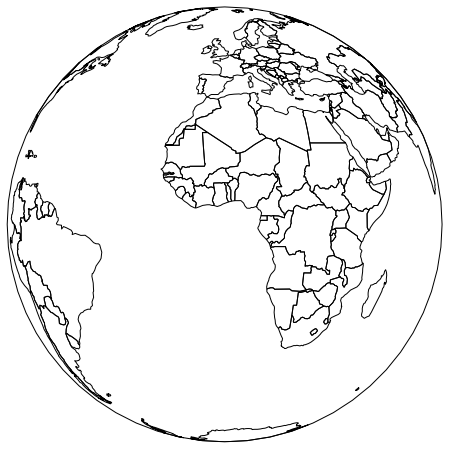

In [4]:
# for different projections check CartoPy
# using the Orthographic map projection (eg a world globe)

ax = geoplot.polyplot(
    world, projection=geoplot.crs.Orthographic(), figsize=(13, 8)
)
ax.outline_patch.set_visible(True)

/home/kjain/miniconda3/envs/geo_env/lib/python3.7/site-packages/geoplot/geoplot.py:672: UserWarning: Cound not set plot extent successfully due to numerical instability. Try setting extent manually. Defaulting to a global extent.
  'Cound not set plot extent successfully due to numerical instability. '


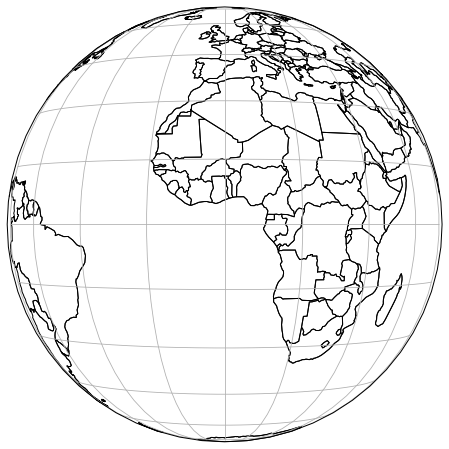

In [5]:

ax = geoplot.polyplot(
    world, projection=geoplot.crs.Geostationary(), figsize=(13, 8)
)

# This statment is for outer dark line
ax.outline_patch.set_visible(True) 

#plt.figure(figsize=(3, 3))
#ax = plt.axes(projection=ccrs.Geostationary())
ax.coastlines(resolution='110m')
ax.gridlines()

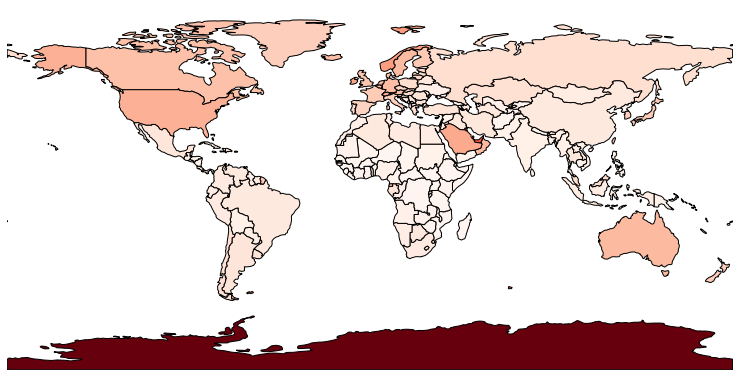

In [6]:
# polyplot only plots geometrics. So for coloring use 'choropleth'

geoplot.choropleth(
    world, hue=world['gdp_md_est']/world['pop_est'],
    cmap='Reds', figsize=(13, 8)
)

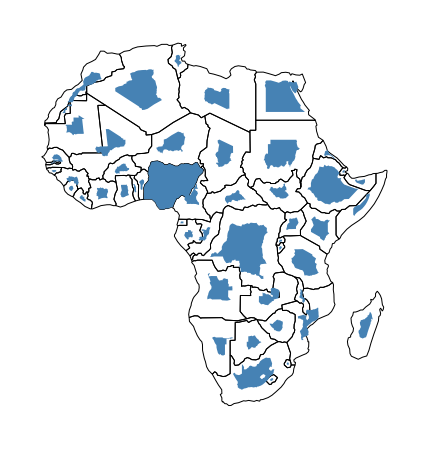

In [11]:
# for size (or any statistical information depicting on the map use 'cartogram') . Example - population estimates 
#for countries in Africa

africa = world.query('continent == "Africa"')
ax = geoplot.cartogram(
    africa, scale='pop_est', limits=(0.3,1),
    edgecolor='None', figsize=(13,8)    
)
geoplot.polyplot(africa, edgecolor='black', ax=ax)



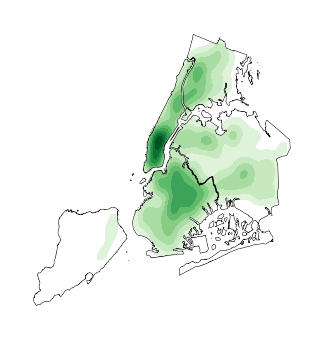

In [13]:
# kernel density plot (three dimensional heat map)


ax = geoplot.kdeplot(
    collisions, clip=boroughs.geometry,
    shade=True, cmap='Greens',
    projection=geoplot.crs.AlbersEqualArea())
geoplot.polyplot(boroughs, ax=ax, zorder=1)

# Plotting with CartoPy and GeoPandas
CartoPy is a Python library that specializes in creating geospatial visualizations. It has a slightly different way of representing Coordinate Reference Systems (CRS) as well as constructing plots. 


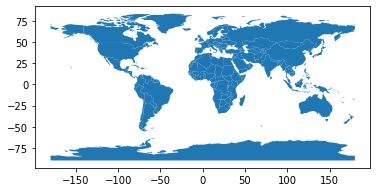

In [23]:
import matplotlib.pyplot as plt
import geopandas
from cartopy import crs as ccrs

# input data from geopandas

path = geopandas.datasets.get_path('naturalearth_lowres')
df = geopandas.read_file(path)
# Add a column we'll use later
df['gdp_pp'] = df['gdp_md_est'] / df['pop_est']
df.plot()

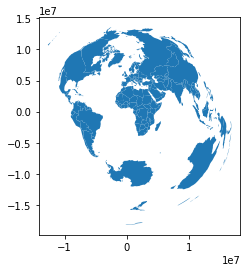

In [22]:

#Plotting with CartoPy

#Cartopy  uses a different system for CRS. To plot data with CartoPy, we’ll first need to project it into a new CRS.
#using a CRS defined within CartoPy and use the GeoPandas to_crs method to make the transformation



# Define the CartoPy CRS object.
crs = ccrs.AzimuthalEquidistant()

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init
df_ae = df.to_crs(crs_proj4)

# Here's what the plot looks like in GeoPandas
df_ae.plot()


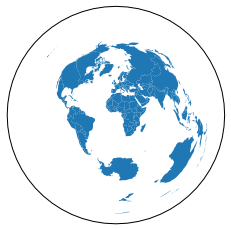

In [25]:
fig, ax = plt.subplots(subplot_kw={'projection': crs})
ax.add_geometries(df_ae['geometry'], crs=crs)

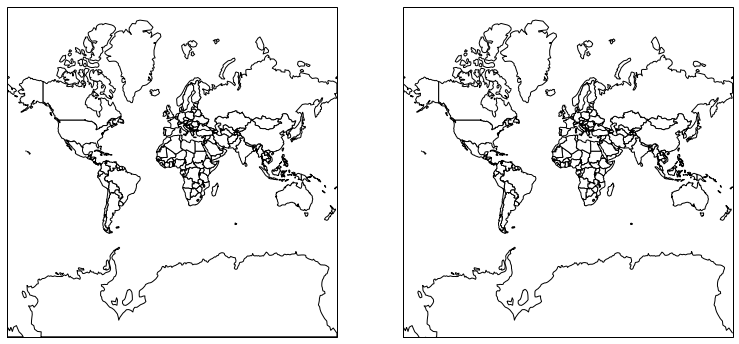

In [27]:
#EPSG stands for European Petroleum Survey Group. They publish a database of coordinate system 
#information plus some very good related documents on map projections and datums.

crs_epsg = ccrs.epsg('3857')
df_epsg = df.to_crs(epsg='3857')

# Generate a figure with two axes, one for CartoPy, one for GeoPandas
fig, axs = plt.subplots(1, 2, subplot_kw={'projection': crs_epsg},
                        figsize=(13, 8))
# Make the CartoPy plot
axs[0].add_geometries(df_epsg['geometry'], crs=crs_epsg,
                      facecolor='white', edgecolor='black')
# Make the GeoPandas plot
df_epsg.plot(ax=axs[1], color='white', edgecolor='black')

# CartoPy to GeoPandas
 performing a CRS projection in CartoPy, and then convert it back into a GeoPandas object.

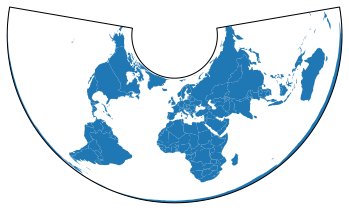

In [28]:
crs_new = ccrs.AlbersEqualArea()
new_geometries = [crs_new.project_geometry(ii, src_crs=crs)
                  for ii in df_ae['geometry'].values]

fig, ax = plt.subplots(subplot_kw={'projection': crs_new})
ax.add_geometries(new_geometries, crs=crs_new)

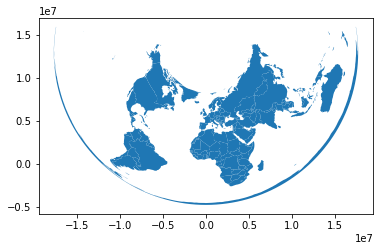

In [29]:
# Creating a GeoDataFrame

df_aea = geopandas.GeoDataFrame(df['gdp_pp'], geometry=new_geometries,
                                crs=crs_new.proj4_init)
df_aea.plot()

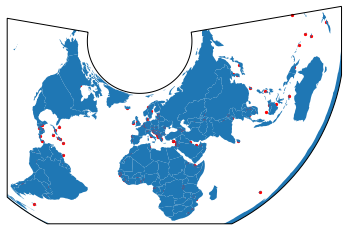

In [30]:
#plot the shapes of the countries with CartoPy. 
#calculating the centroid of each with GeoPandas and plot it on top

# Generate a CartoPy figure and add the countries to it
fig, ax = plt.subplots(subplot_kw={'projection': crs_new})
ax.add_geometries(new_geometries, crs=crs_new)

# Calculate centroids and plot
df_aea_centroids = df_aea.geometry.centroid
df_aea_centroids.plot(ax=ax, markersize=5, color='r')

plt.show()